# Image Classification

In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
img_path = 'sample_images/000006_04.jpg'

In [3]:
# Load color image
bgr_img = cv2.imread(img_path)

In [4]:
# Convert to grayscale
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

In [5]:
# Normalize, rescale entries to lie in [0,1] 
gray_img = gray_img.astype("float32")/255

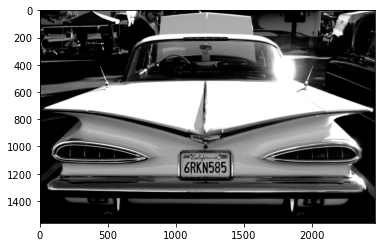

In [6]:
# Plot image
plt.imshow(gray_img, cmap='gray') 
plt.show()

In [10]:
import numpy as np
filter_vals = np.array([[1, -1, 1], [1, -1, 1], [1, -1, 1]])
print('Filter shape: ', filter_vals.shape)

Filter shape:  (3, 3)


In [12]:
# Define four different filters, all of which are linear combinations of the `filter_vals` defined above
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
# filter_4 = -filter_3
filters = np.array([filter_1, filter_2, filter_3])
# Print out the values of filter 1 as an example 
print('Filter 1: \n', filter_1)

Filter 1: 
 [[ 1 -1  1]
 [ 1 -1  1]
 [ 1 -1  1]]


In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [14]:
# Neural network with one convolutional layer with four filters 
class Net(nn.Module):
    def __init__(self, weight):
        super(Net, self).__init__()
        # Initializes the weights of the convolutional layer to be the weights of the 4 defined filters
        k_height, k_width = weight.shape[2:]
        # Assumes there are 3 grayscale filters
        self.conv = nn.Conv2d(1, 3, kernel_size=(k_height, k_width),bias=False)
        self.conv.weight = torch.nn.Parameter(weight)
        
    def forward(self, x):
        # Calculates the output of a convolutional layer pre- and post-activation
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)
        # Returns both layers 
        return conv_x, activated_x

In [15]:
# Instantiate the model and set the weights
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor) 
model = Net(weight)

In [16]:
# Print out the layer in the network 
print(model)

Net(
  (conv): Conv2d(1, 3, kernel_size=(3, 3), stride=(1, 1), bias=False)
)


In [17]:
def viz_layer(layer, n_filters= 3): 
    fig = plt.figure(figsize=(20, 20))
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
        # Grab layer outputs 
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray') 
        ax.set_title('Output %s' % str(i+1))

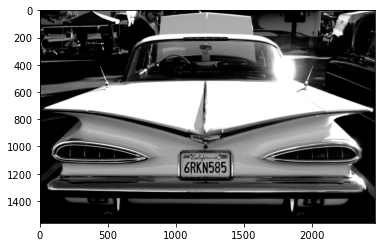

In [18]:
# Plot original image 
plt.imshow(gray_img, cmap='gray')

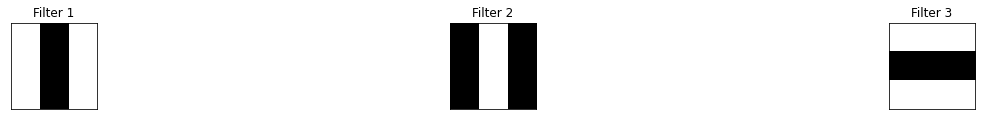

In [19]:
# Visualize all of the filters
fig = plt.figure(figsize=(12, 6)) 
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(3):
    ax = fig.add_subplot(1, 3, i+1, xticks=[], yticks=[]) 
    ax.imshow(filters[i], cmap='gray') 
    ax.set_title('Filter %s' % str(i+1))

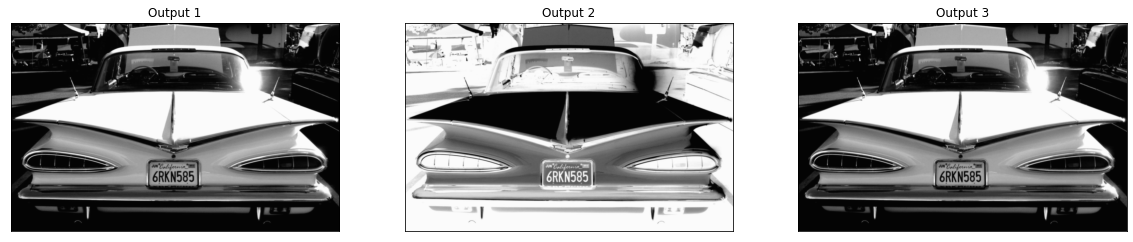

In [20]:
# Convert the image into an input tensor 
gray_img_tensor = torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(1)
# Get the convolutional layer (pre and post activation) 
conv_layer, activated_layer = model(gray_img_tensor)
# Visualize the output of a convolutional layer 
viz_layer(conv_layer)

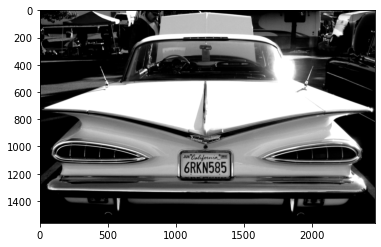

In [21]:
# convert to grayscale for filtering
gray = cv2.cvtColor(bgr_img, cv2.COLOR_RGB2GRAY) 
plt.imshow(gray, cmap='gray')

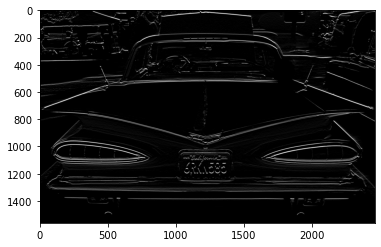

In [22]:
# 3x3 array for edge detection 
sobel_y = np.array([[ -1, -2, -1],[ 0, 0, 0], [ 1, 2, 1]])
sobel_x = np.array([[ -1, 0, 1], [ 0, 0, 0],[ 1, 2, 1]])
filtered_image = cv2.filter2D(gray, -1, sobel_y)
plt.imshow(filtered_image, cmap='gray')

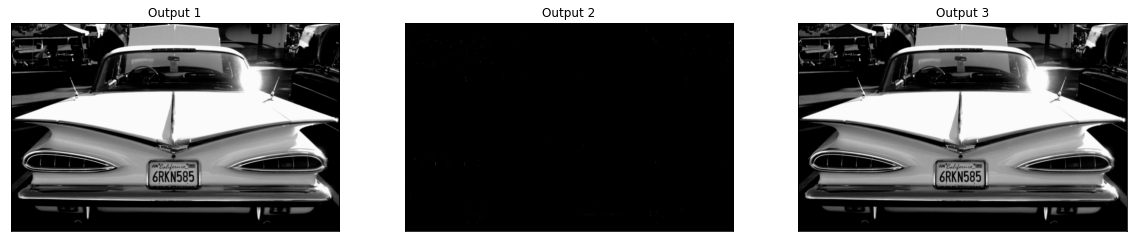

In [23]:
viz_layer(activated_layer)